In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('voos_GRU_SDU.csv')
df = df.drop(columns=['Unnamed: 0'])

df0 = df

print(df.shape)
df.head()

(2599, 19)


,ICAO Empresa Aérea,Número Voo,Situação Voo,Atraso,Hora Partida,Dia Mês,Mês,Dia Semana,Tipo da nuvem da primeira camada,DireÇõÇo do Vento (0-360),Veloc. do Vento (m/s),Alt. da base das nuvens na primeira camada (m),Cobertura de nuvens da camada mais restrita(%),Cobertura de nuvens da primeira camada (oitavos),PressÇo reduzida ao nÇðvel do mar - QNH( hPa),Temp. do ar (C),Temp. do Ponto de Orvalho (C),Visibilidade horizontal (m) (acima de 10000m VV=10000),"Tempo Presente (Tabela 020003) <a href=""http://bancodedados.cptec.inpe.br/~rbanco/bdm/tabela_bufr_20003.pdf"">Detalhes</a>"
0,AZU,2400,REALIZADO,21,6.250000,1,Janeiro,Segunda,0.0,330.0,2.57,173.0,6.0,1.968.504,1013.89,21.0,20.0,10000.0,0.0
1,GLO,1076,REALIZADO,0,8.083333,1,Janeiro,Segunda,0.0,310.0,2.06,156.0,2.0,656.168,1013.89,20.0,20.0,10000.0,0.0
2,TAM,4605,REALIZADO,0,8.666667,1,Janeiro,Segunda,0.0,310.0,2.06,156.0,2.0,656.168,1013.89,20.0,20.0,10000.0,0.0
3,GLO,1078,REALIZADO,0,10.250000,1,Janeiro,Segunda,0.0,310.0,4.63,172.0,3.0,984.252,1013.89,22.0,20.0,10000.0,0.0
4,AZU,2402,REALIZADO,-3,13.750000,1,Janeiro,Segunda,0.0,330.0,5.15,173.0,6.0,1.968.504,1014.91,24.0,20.0,10000.0,0.0


# Gráficos com Atrasos por cada atributo

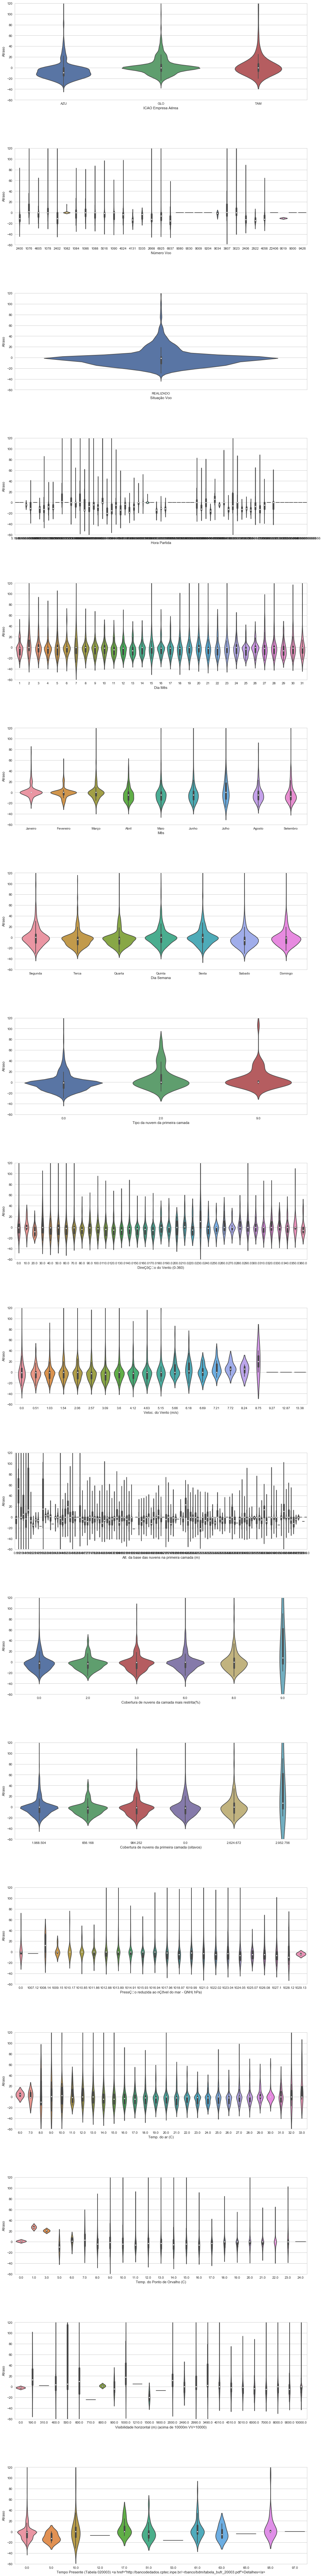

In [2]:
sns.set(style="whitegrid")
#ax = sns.violinplot(x='ICAO Empresa Aérea', y='Atraso', data=df)

def violin_all(dataframe, output_column, ylim=None):
    X = dataframe.drop(columns=output_column)

    labels = X.columns
    cols = X.shape[1]
    
    fig, axs = plt.subplots(cols, 1, figsize=(16, 8*cols))#, facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    
    for i in range(0,cols):
        sns.violinplot(x=labels[i], y=output_column, data=dataframe, ax=axs[i])
            
        if ylim is not None:
            axs[i].set_ylim(ylim)
        
violin_all(df, 'Atraso', ylim=(-60, 120))

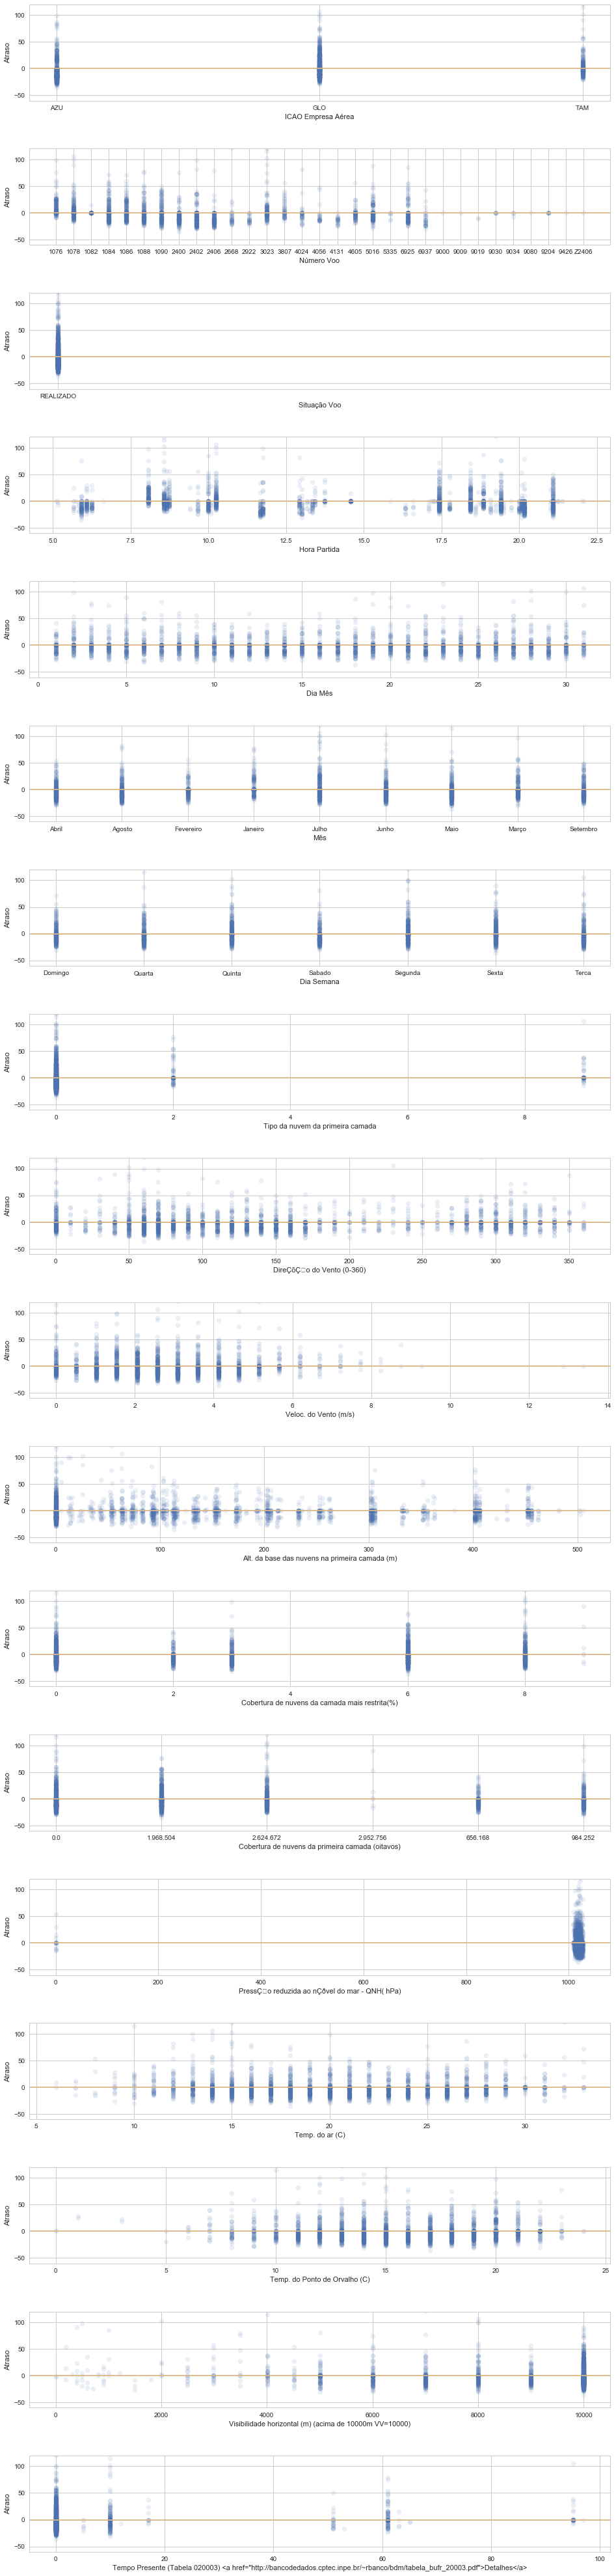

In [3]:
def scatter_all(dataframe, output_column, href=None, color_ref='burlywood', alpha=0.2, ylim=None):
    X = dataframe.drop(columns=output_column)

    labels = X.columns
    cols = X.shape[1]
    
    fig, axs = plt.subplots(cols, 1, figsize=(16, 4*cols))#, facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    
    for i in range(0,cols):
        if href is not None:
            axs[i].axhline(y=href, color=color_ref)
            
        axs[i].scatter(x=X.iloc[:,i], y=dataframe[output_column], alpha=alpha)
        #axs[i].set_title(output_column + ' por ' + labels[i])
        axs[i].set_xlabel(labels[i])
        axs[i].set_ylabel(output_column)
        
        if ylim is not None:
            axs[i].set_ylim(ylim)

scatter_all(df, 'Atraso', href=0, alpha=0.1, ylim=(-60, 120))
#scatter_all(df, 'Situação Voo', alpha=0.1)#, ylim=(-60, 120))